In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data importing & inspection:

In [3]:
# Load the Dataset
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [59]:
df = data.copy()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 2. Data Preparation:

In [61]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [62]:
df.dropna(inplace=True)

In [63]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [64]:
# Here we can see that min value for Quantity column is negative
# changing the datatype to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [65]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
df_without_Cancellation = df[~df['InvoiceNo'].str.contains('C',na=False)].reset_index(drop=True)
df_without_Cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [66]:
# Checking how many values are present for unitprice==0
len(df_without_Cancellation[df_without_Cancellation['UnitPrice']==0])

40

In [67]:
df_final=df_without_Cancellation[df_without_Cancellation['UnitPrice']>0]
df_final.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [68]:
df_final.shape

(397884, 8)

# Feature Engineering:

In [135]:
df_final["year"] = df_final["InvoiceDate"].apply(lambda x: x.year)
df_final["month_num"] = df_final["InvoiceDate"].apply(lambda x: x.month)
df_final["day_num"] = df_final["InvoiceDate"].apply(lambda x: x.day)
df_final["hour"] = df_final["InvoiceDate"].apply(lambda x: x.hour)
df_final["minute"] = df_final["InvoiceDate"].apply(lambda x: x.minute)

In [136]:
df_final['Month']=df_final['InvoiceDate'].dt.month_name()
df_final['Day']=df_final['InvoiceDate'].dt.day_name()

In [137]:
df_final['TotalSpending'] = df_final['Quantity'] * df_final['UnitPrice']

In [138]:
RFM_data = df_final.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df_final['InvoiceDate'].max() - x.max()).days,
                                                             'InvoiceNo': 'count',
                                                             'TotalSpending':'sum'
                                                             })
RFM_data.columns=['Recency','Frequency','Monetary']
RFM_data=RFM_data[RFM_data['Monetary']>0]

RFM_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


# EDA:

### *Top 10 items in terms of description(Name)*

In [74]:
top_10_product=df_final['Description'].value_counts().reset_index().rename(columns={'Description':'Product_name','count':'Count'})
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
...,...,...
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1


Text(0.5, 1.0, 'Top 10 products')

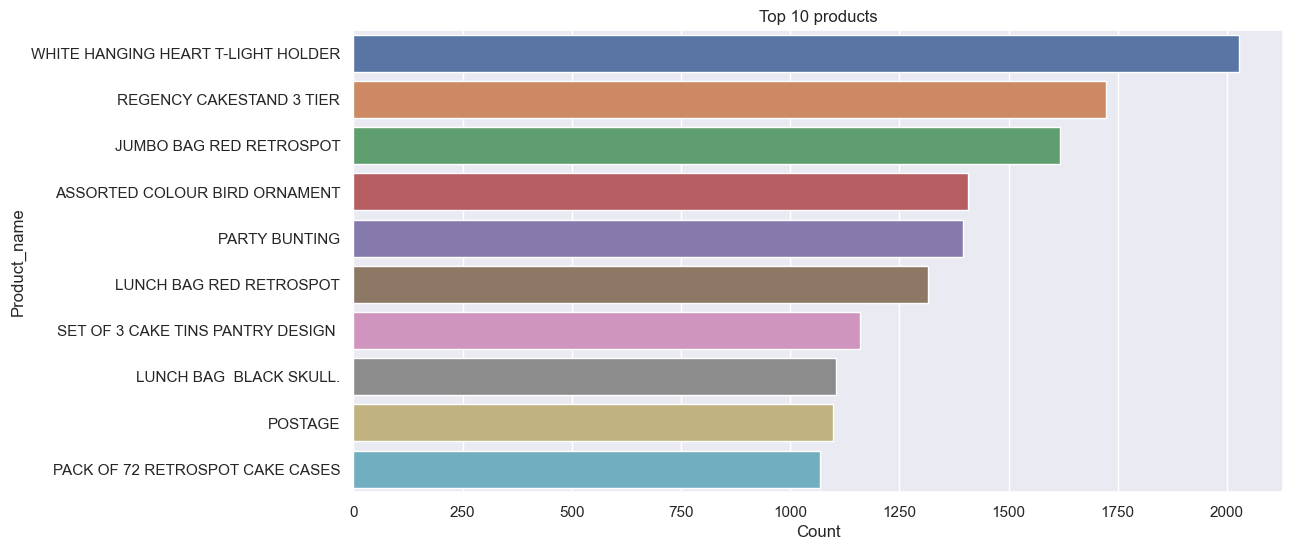

In [75]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'].head(10),y=top_10_product['Product_name'].head(10))
plt.title('Top 10 products')

Observations

*WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product almost 2018 units were sold*

*REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold*

### *Top 10 items in terms of CustomerID.*

In [76]:
top_10_customers=df_final['CustomerID'].value_counts().reset_index().rename(columns={'count':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


Text(0.5, 1.0, 'Top 10 frequent Customers.')

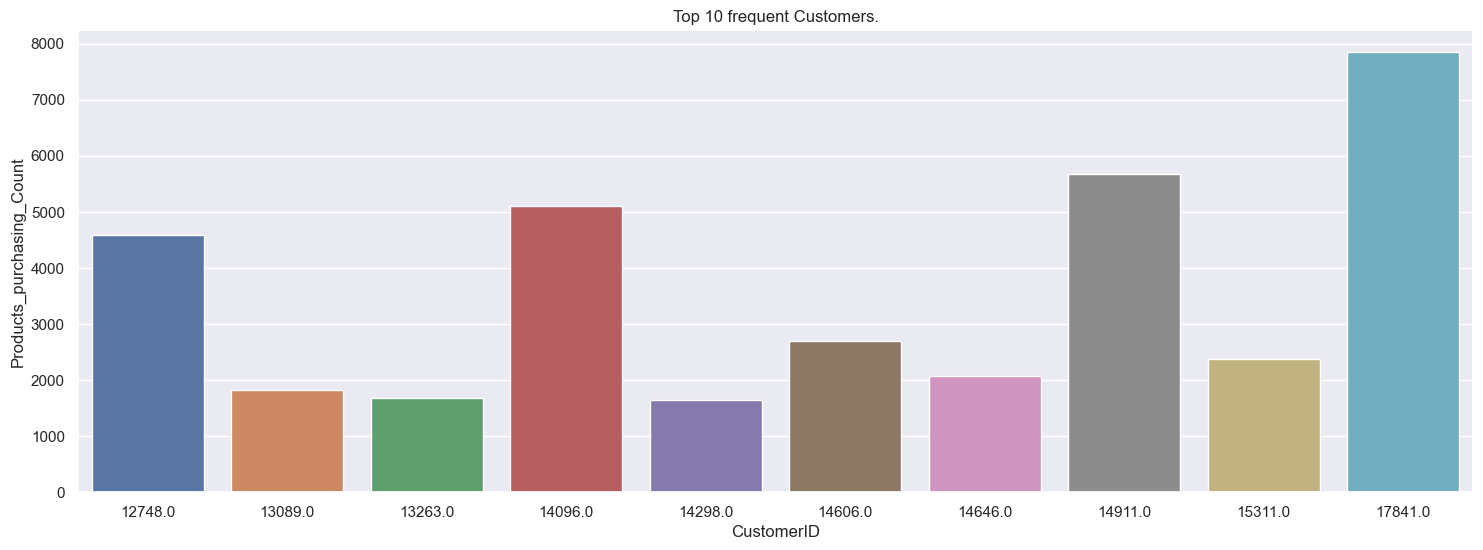

In [77]:
# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

Observation

*CustomerID- 17841 had purchased highest number of products*

*CustomerID-14911 is the 2nd higest customer who purchased the most the products*

In [78]:
top_5_countries=df_final['Country'].value_counts().reset_index().rename(columns={'count':'Customer_count'})
top_5_countries

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

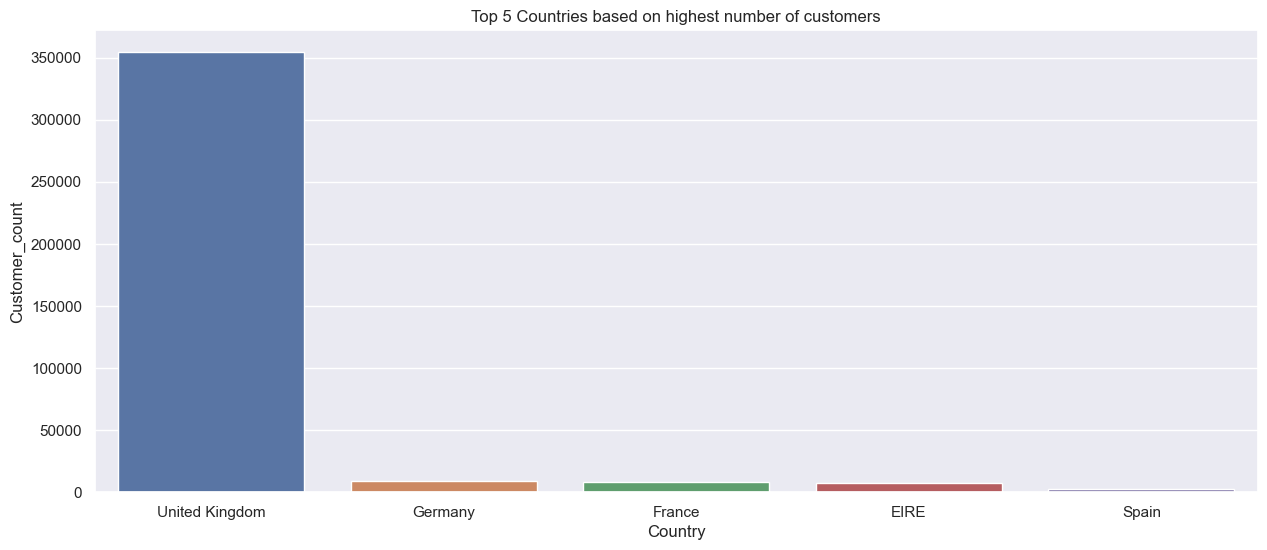

In [79]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

Observation

*UK has highest number of customers*

*Germany,France and IreLand has almost equal number of customers*

Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

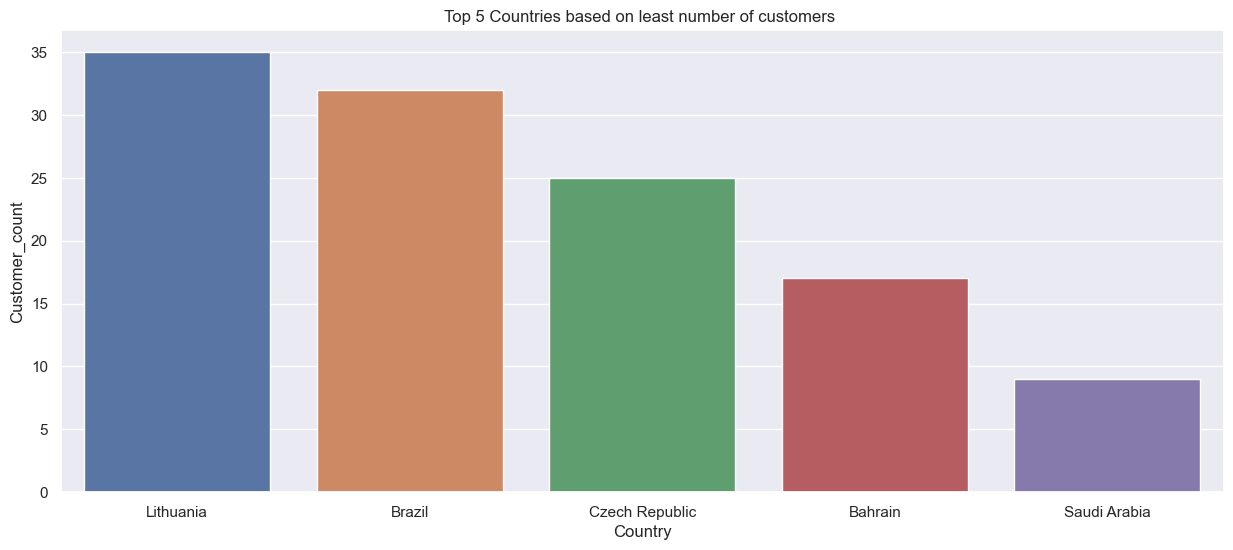

In [80]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')

Observations

*There are very less customers from Saudi Arabia*

*Bahrain is the 2nd Country having least number of customers*

In [81]:
sales_in_month=df_final['Month'].value_counts().reset_index().rename(columns={'count':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


Text(0.5, 1.0, 'Sales count in different Months ')

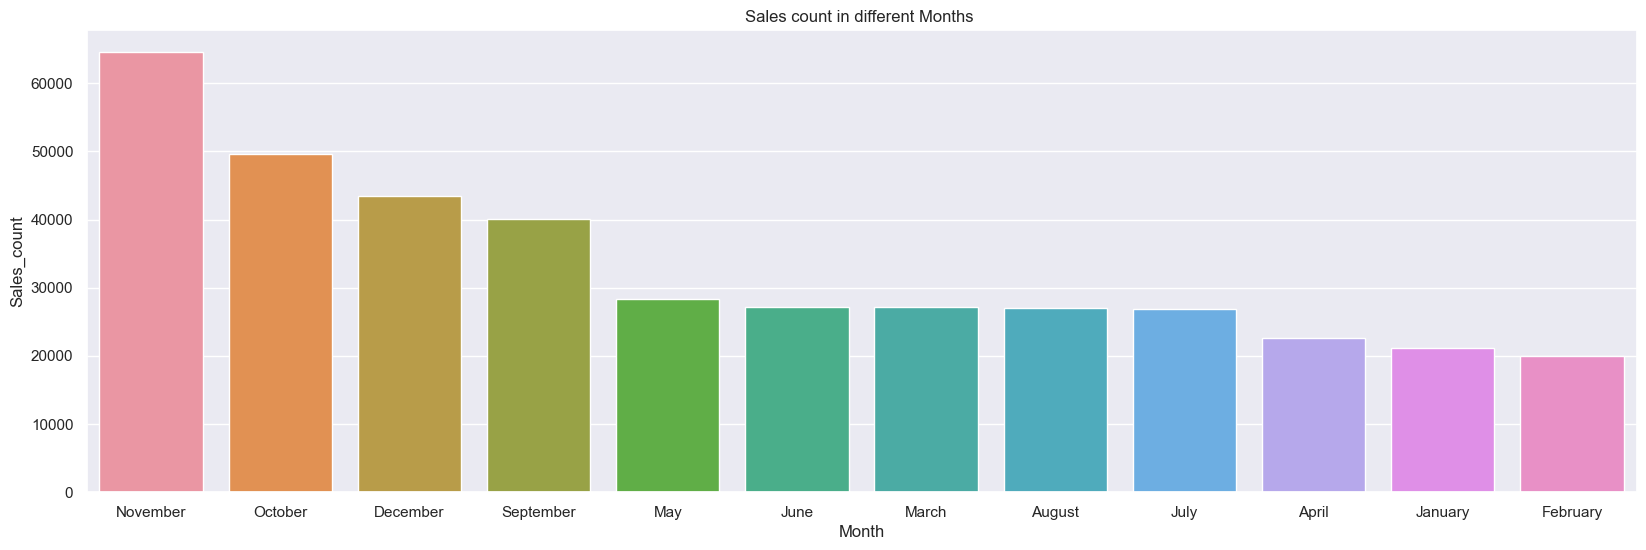

In [82]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

Observations

*Most of the sale happened in Novmenber month.*

*February Month had least sales.*

In [83]:
sales_on_day_basis=df_final['Day'].value_counts().reset_index().rename(columns={"count":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


Text(0.5, 1.0, 'Sales count on different Days ')

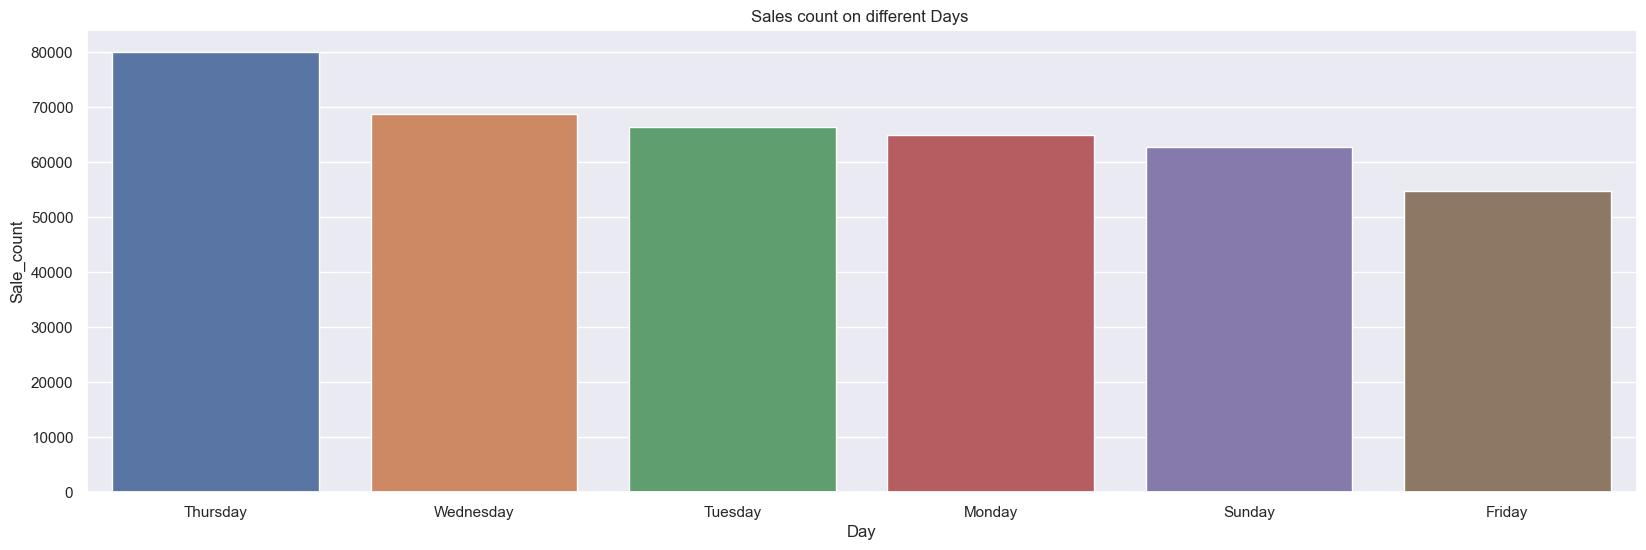

In [84]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

Observation

*Sales On Thursdays are very high.*

*Sales On Fridays are very less*

In [85]:
df_final['hour'].unique()
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening' 
df_final['Day_time_type']=df_final['hour'].apply(time)

In [86]:
sales_timing=df_final['Day_time_type'].value_counts().reset_index().rename(columns={'count':'Sales_count'})
sales_timing

,Day_time_type,Sales_count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


Text(0.5, 1.0, 'Sales count in different day timings')

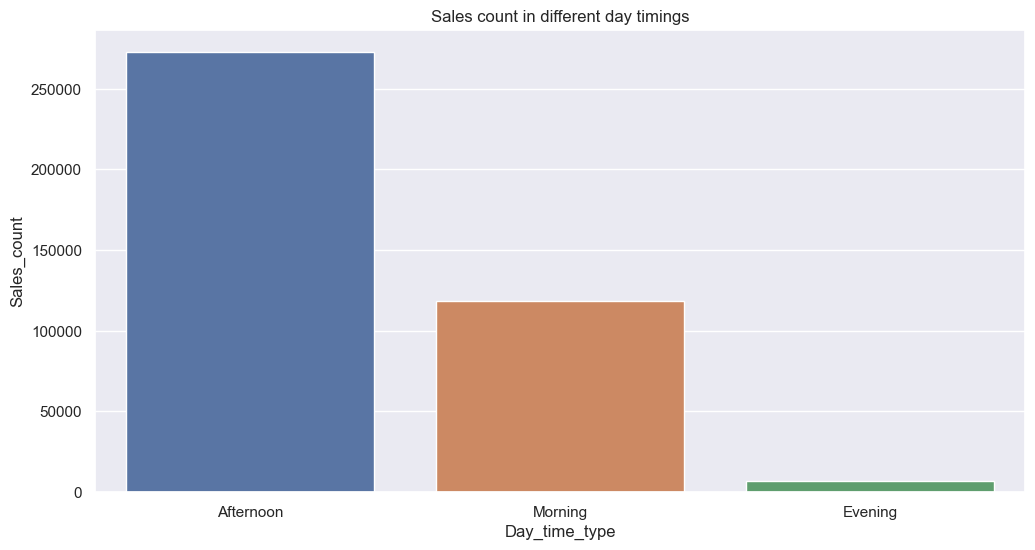

In [87]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')

Observations

*Most of the sales happens in the afternoon.*

*Least sales happens in the evening.*

# Model Building

The RFM framework is a marketing and customer segmentation technique that businesses use to analyze and categorize their customer base. RFM stands for Recency, Frequency, and Monetary Value, and it helps businesses understand and target their customers more effectively by considering three key dimensions of customer behavior:

Recency (R): This dimension assesses how recently a customer has made a purchase or interacted with the business. Customers who have engaged with the business more recently are often considered more valuable, as they are more likely to make repeat purchases or continue their engagement. Recency is usually measured in terms of days, months, or years since the last transaction or interaction.

Frequency (F): Frequency represents how often a customer makes purchases or interacts with the business. Customers who buy or engage more frequently are often considered more loyal and valuable. Frequency is typically measured as the number of transactions or interactions within a specific time period.

Monetary Value (M): Monetary Value refers to the amount of money a customer has spent on products or services from the business. Customers with higher monetary value are those who make larger and more profitable purchases. This dimension is measured in terms of the total amount spent over a specific period.

To implement the RFM framework, businesses usually assign scores or ranks to customers based on these three dimensions. For example, they might rate each customer on a scale from 1 to 5 for each of the R, F, and M dimensions, with higher scores indicating better recency, higher frequency, or greater monetary value.

Once the RFM scores are assigned, businesses can segment their customer base into different groups or clusters. These segments can help inform marketing strategies, such as:

Retention: Targeting customers with high recency and frequency to encourage repeat business and loyalty.
Win-back: Identifying customers who have made purchases in the past but have lapsed in activity (low recency) and devising strategies to re-engage them.
High-value: Focusing on customers with high monetary value to maximize revenue and profitability.
Low-value: Identifying customers with low monetary value and deciding whether it's worth investing in strategies to increase their value or simply maintaining minimal engagement.
The RFM framework is a simple and effective way for businesses to tailor their marketing efforts, personalize communications, and allocate resources more efficiently based on customer behavior patterns. However, it's important to note that RFM is just one tool in the marketing toolkit and may need to be supplemented with other data and strategies for a more comprehensive understanding of customers.

In [139]:
RFM_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [140]:
# Descriptive Stats= Recency
RFM_data.Recency.describe()

count    4338.000000
mean       91.536422
std       100.014169
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

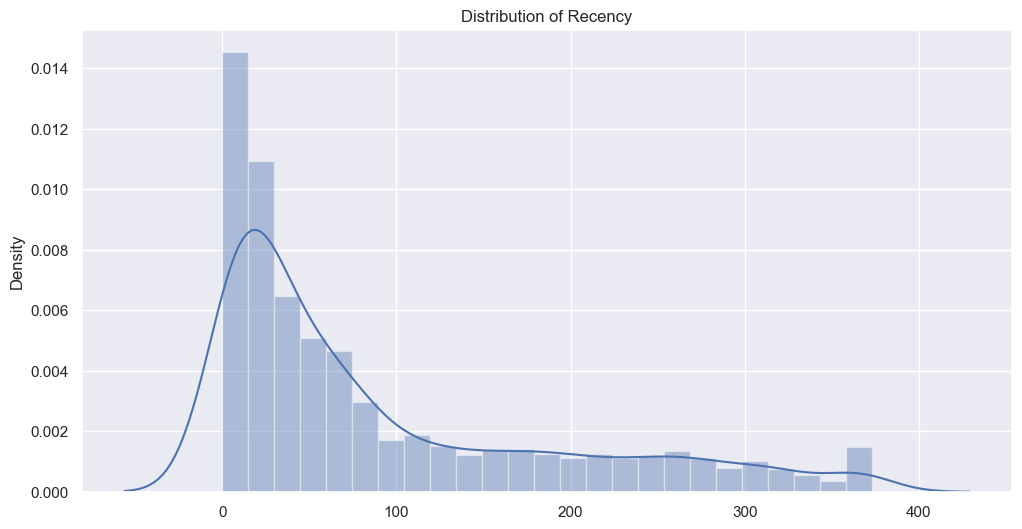

In [141]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFM_data['Recency'])
plt.title('Distribution of Recency')

*Distribution of Recency is right skewed.*

In [142]:
# Descriptive Stats= Frequency
RFM_data['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

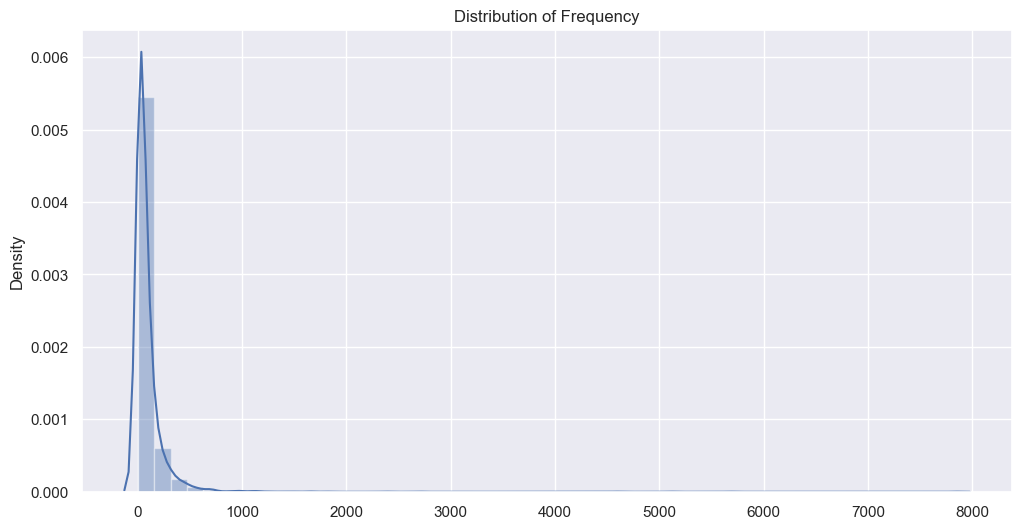

In [143]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFM_data['Frequency'])
plt.title('Distribution of Frequency')

*Distribution of Frequency is highly right skewed.*

In [144]:
# Descriptive Stats= Monetary
RFM_data['Monetary'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

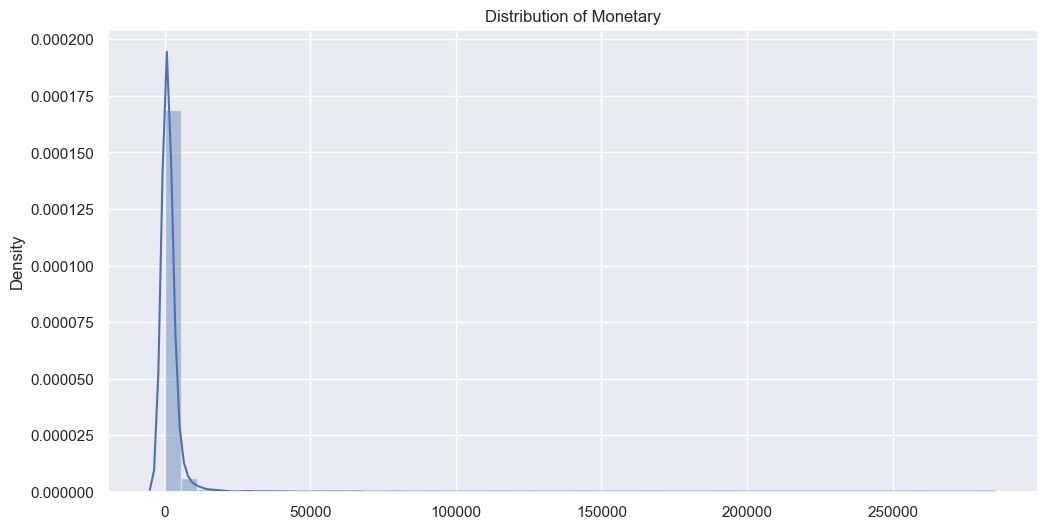

In [145]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFM_data['Monetary'])
plt.title('Distribution of Monetary')

*Distribution of Monetary is highly right skewed.*

In [146]:
# lower the recency, bad for the company
# higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
RFM_data["R_score"]=pd.qcut(RFM_data["Recency"],q=5,labels=[5,4,3,2,1])
RFM_data["F_score"]=pd.qcut(RFM_data['Frequency'].rank(method='first'),q=5,labels=[1,2,3,4,5])
RFM_data["M_score"]=pd.qcut(RFM_data['Monetary'],q=5,labels=[1,2,3,4,5])

In [147]:
# Add a new column to combine RFM score
RFM_data['RFM_Group'] = (RFM_data.R_score.astype(str)+RFM_data.F_score.astype(str))

In [148]:
RFM_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,11
12347.0,1,182,4310.00,5,5,5,55
12348.0,74,31,1797.24,2,3,4,23
12349.0,18,73,1757.55,4,4,4,44
12350.0,309,17,334.40,1,2,2,12
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,11
18281.0,180,7,80.82,1,1,1,11
18282.0,7,12,178.05,5,1,1,51


In [149]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4338 non-null   int64   
 1   Frequency  4338 non-null   int64   
 2   Monetary   4338 non-null   float64 
 3   R_score    4338 non-null   category
 4   F_score    4338 non-null   category
 5   M_score    4338 non-null   category
 6   RFM_Group  4338 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 182.8+ KB


In [150]:
seg={
    r'[1-2][1-2]':'hibernating',
    r'[1-2][3-4]':'at_Risk',
    r'[1-2]5':'cant_loose',
    r'3[1-2]':'about_to_sleep',
    r'33':'need_attention',
    r'[3-4][4-5]':'loyal_customer',
    r'41':'promising',
    r'51':'new_customer',
    r'[4-5][2-3]':'potential_loyalists',
    r'5[4-5]':'champions',
}
RFM_data['RFM_Loyalty_Level']=RFM_data['RFM_Group'].replace(seg, regex=True)
RFM_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Loyalty_Level
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,11,hibernating
12347.0,1,182,4310.00,5,5,5,55,champions
12348.0,74,31,1797.24,2,3,4,23,at_Risk
12349.0,18,73,1757.55,4,4,4,44,loyal_customer
12350.0,309,17,334.40,1,2,2,12,hibernating
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,11,hibernating
18281.0,180,7,80.82,1,1,1,11,hibernating
18282.0,7,12,178.05,5,1,1,51,new_customer


In [153]:
RFM_data[['Recency','Frequency','Monetary','RFM_Loyalty_Level']].groupby('RFM_Loyalty_Level').agg({'mean', 'min', 'max','count'}).round(2)

Recency                Frequency                   \
                       mean count min  max      mean count  min   max   
RFM_Loyalty_Level                                                       
about_to_sleep        52.84   321  33   71     15.68   321    1    29   
at_Risk              166.37   578  72  373     56.11   578   29   119   
cant_loose           145.27    81  72  371    182.30    81  122   543   
champions              4.92   607   0   12    288.62   607   58  7847   
hibernating          210.39  1049  72  373     13.39  1049    1    29   
loyal_customer        33.03   827  13   71    156.35   827   58  1204   
need_attention        51.65   207  33   71     41.43   207   29    58   
new_customer           5.71    55   0   10      7.35    55    1    13   
potential_loyalists   15.46   506   0   32     34.32   506   14    58   
promising             22.05   107  13   32      7.19   107    1    14   

                    Monetary                           
                        mean count     min        max  
RFM_Loyalty_Level                                      
about_to_sleep        475.30   321    6.20    7330.80  
at_Risk               984.73   578   67.23   11072.67  
cant_loose           2393.52    81  411.53   10254.18  
champions            6950.14   607  190.19  280206.02  
hibernating           530.88  1049    3.75   77183.60  
loyal_customer       2825.69   827  155.37  124914.53  
need_attention        848.14   207   97.97   11581.80  
new_customer         3742.13    55   41.99  168472.50  
potential_loyalists   900.48   506   68.84   26879.04  
promising             432.68   107   20.80    6748.80

In [193]:
Q1 = RFM_data.Monetary.quantile(0.05)
Q3 = RFM_data.Monetary.quantile(0.95)
IQR = Q3 - Q1
RFM_data = RFM_data[(RFM_data.Monetary >= Q1 - 1.5*IQR) & (RFM_data.Monetary <= Q3 + 1.5*IQR)]

Q1 = RFM_data.Recency.quantile(0.05)
Q3 = RFM_data.Recency.quantile(0.95)
IQR = Q3 - Q1
RFM_data = RFM_data[(RFM_data.Recency >= Q1 - 1.5*IQR) & (RFM_data.Recency <= Q3 + 1.5*IQR)]

Q1 = RFM_data.Frequency.quantile(0.05)
Q3 = RFM_data.Frequency.quantile(0.95)
IQR = Q3 - Q1
RFM_data = RFM_data[(RFM_data.Frequency >= Q1 - 1.5*IQR) & (RFM_data.Frequency <= Q3 + 1.5*IQR)]
RFM_data

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
12352.0,35,8,2506.04
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [195]:
X = RFM_data[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-0.91746929,  0.87220289,  1.66649741],
       [-0.1881319 ,  0.0952091 ,  0.26793561],
       [-0.74762359, -0.68178469,  0.2458448 ],
       ...,
       [-0.85752375, -0.42278676, -0.63327949],
       [-0.89748744,  3.20318426,  0.40612983],
       [-0.50784144, -0.16378883,  0.29022123]])

In [196]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [197]:
explained_variance_ratio = pca.explained_variance_ratio_
n_components = pca.n_components_
print(explained_variance_ratio,n_components,pca.components_)

[0.67192928 0.25224362 0.0758271 ] 3 [[-0.44241157  0.64238195  0.62579344]
 [ 0.8934733   0.25556027  0.36931615]
 [-0.07731408 -0.72251947  0.68701394]]


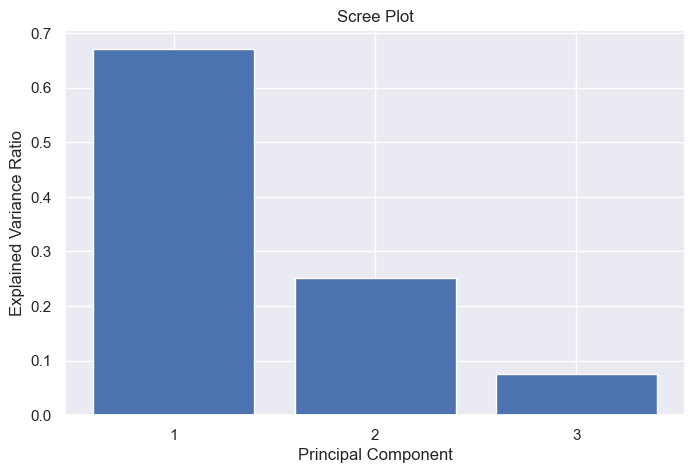

In [198]:
plt.figure(figsize=(8, 5))
plt.bar(['1','2','3'], explained_variance_ratio)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

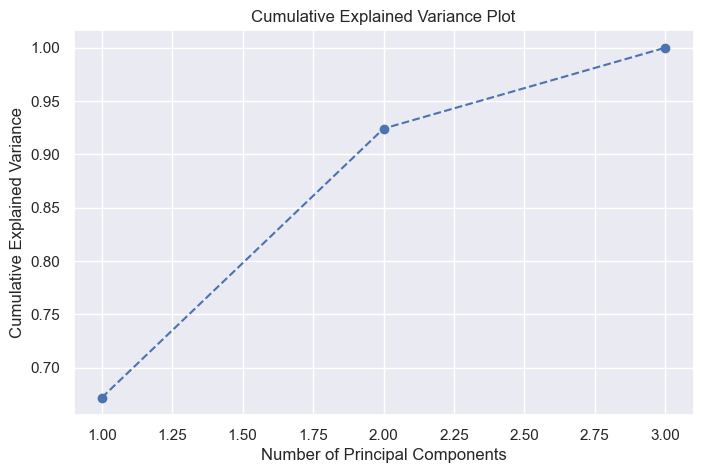

In [199]:
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [200]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca.components_

array([[-0.44241157,  0.64238195,  0.62579344],
       [ 0.8934733 ,  0.25556027,  0.36931615]])

In [203]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                        columns=RFM_data.columns,
                        index=['Component 1','Component 2'])
df_pca_comp

,Recency,Frequency,Monetary
Component 1,-0.442412,0.642382,0.625793
Component 2,0.893473,0.255560,0.369316


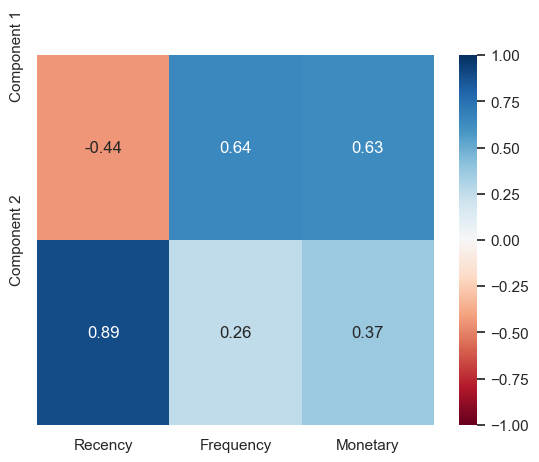

In [215]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks(ticks=[0,1],
    labels=['Component 1','Component 2'])

plt.show()

In [217]:
kmeans = KMeans()
kmeans.fit(pca_result)
lbs = kmeans.labels_
print(kmeans.labels_)

c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 7 0 ... 0 5 7]


c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

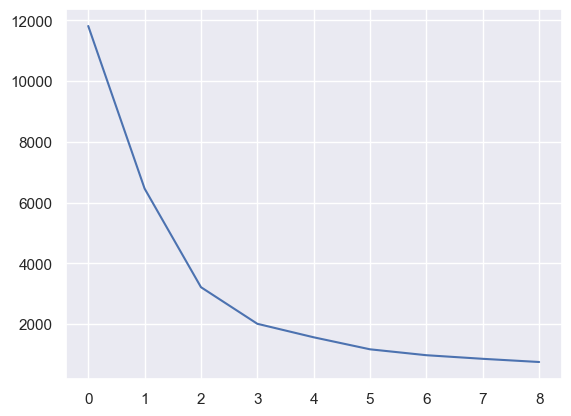

In [223]:
wss = []
for num_clusters in range(1,10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_result)
    wss.append(kmeans.inertia_)
    
plt.plot(wss)

In [230]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_result)
lbs = kmeans.labels_

c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [231]:
RFM_data['Cluster_Id'] = lbs
RFM_data

,Recency,Frequency,Monetary,Cluster_Id
CustomerID,,,,
12347.0,1,7,4310.00,0
12348.0,74,4,1797.24,1
12349.0,18,1,1757.55,1
12350.0,309,1,334.40,3
12352.0,35,8,2506.04,0
...,...,...,...,...
18280.0,277,1,180.60,3
18281.0,180,1,80.82,3
18282.0,7,2,178.05,1


c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster_Id', ylabel='Monetary'>

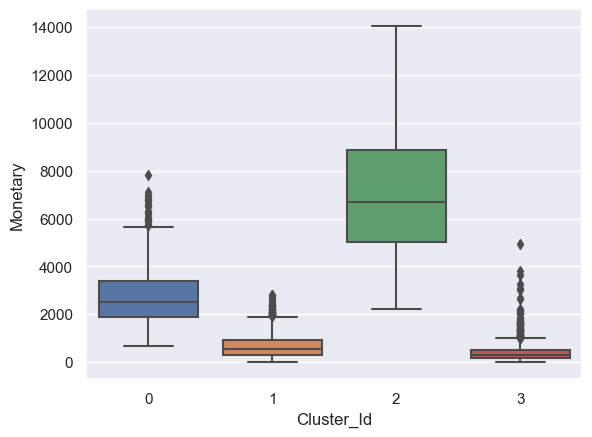

In [232]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=RFM_data)

c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

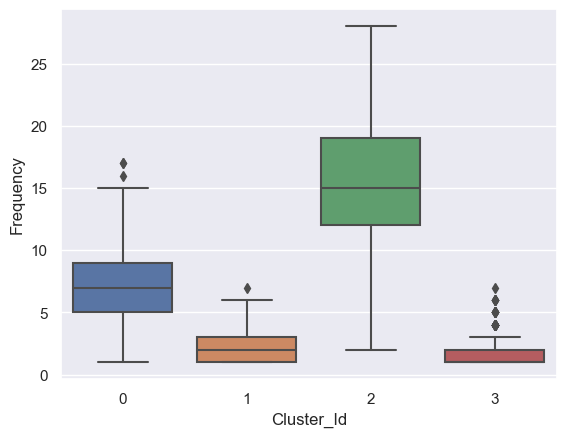

In [233]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM_data)

c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hazim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster_Id', ylabel='Recency'>

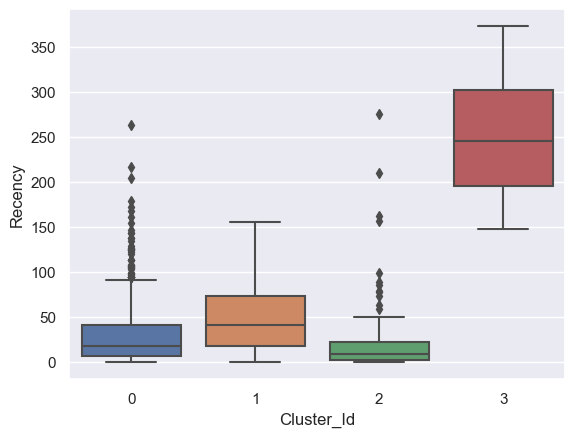

In [234]:
sns.boxplot(x='Cluster_Id', y='Recency', data=RFM_data)

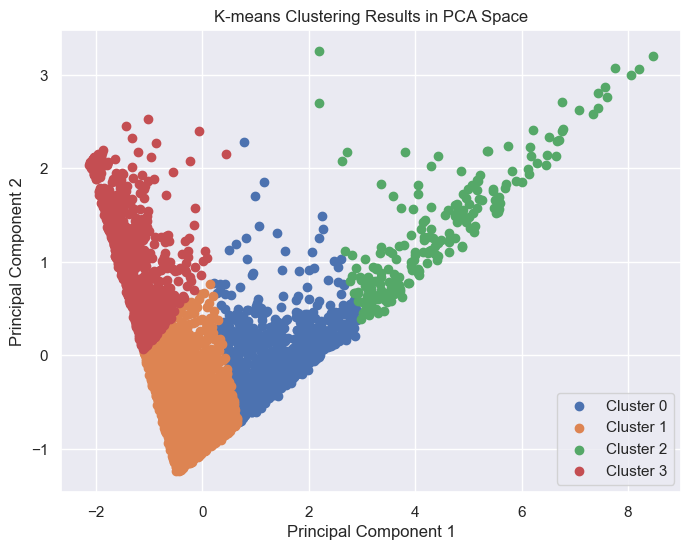

In [239]:
# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))

# Plot points belonging to different clusters with different colors
for cluster_label in range(4):
    plt.scatter(pca_result[lbs == cluster_label, 0], pca_result[lbs == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.title('K-means Clustering Results in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()